### Table of Contents

* [Introduction to PCA Analysis](#Chapter1)
    * [Importing Libraries 1.1](#section_1_1)
    * [Loading the files 1.2](#section_1_2)
    * [Displaying the files 1.3](#section_1_3)
    * [Data Prepration 1.4](#section_1_4)
    * [Plotting PCA 1.5](#section_1_5)
    * [Linear Regression Analysis 1.6](#section_1_6)
    * [Results 1.7](#section_1_7)
    

### Introduction to PCA Analysis <a class="anchor" id="Chapter1"></a>

Principal component analysis is a process of figuring out most important features or principal components that has the most impact on the target variable.

#### Importing Libraries <a class="anchor" id="section_1_1"></a>

In [1]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
import statsmodels.formula.api as smf

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os

#Input your working directory here
os.chdir('C://Users//usury//Desktop//AROMYX-INTERNSHIP//DS//PC1-PC2')

#### Loading the files <a class="anchor" id="section_1_2"></a>

In [2]:
# load the files from the working directory
d1 = pd.read_csv('Aromyx_wine list.xlsx - with_descriptions.csv')
d2 = pd.read_csv('data_no_normalization.csv')

<!-- ### Chapter 1 <a class="anchor" id="chapter1"></a> -->

#### Displaying the files <a class="anchor" id="section_1_3"></a>

In [3]:
# Group by Olfactory receptor, plate and take mean, there are two samples collected for each reading
d2 = d2.loc[:,['OR','Plate','Firefly_bgnorm']].groupby(['Plate','OR']).mean()
# Reset index so that plates and OR are in columns]
d2.reset_index(drop = False, inplace = True)
d1 = d1[d1['red_white'] == 'red'].reset_index(drop = True)
d1

,test_set,product_id,Review (Vivino),Review (Cellar Tracker),Sample Number,OR_test_id,Group,Name,URL,Year,...,Country,SuperRegion,acidity,fruity,body-rich,Price,sweetness,dryness,alcohol,balanced
0,NaN,marques_de_rioja_tempranillo_2017,https://www.vivino.com/US-CA/en/marques-de-cac...,https://www.cellartracker.com/wine.asp?iWine=3...,1,1,1,Marques de Caceres Crianza,https://www.missionliquor.com/products/marques...,2017.0,...,Spain,Europe,NaN,0.1,0.00,12.99,NaN,NaN,NaN,NaN
1,NaN,barons_de_bordeaux_cabernet_2017,https://www.vivino.com/US-CA/en/barons-de-roth...,https://www.cellartracker.com/wine.asp?iWine=3...,2,2,2,Domaines Barons de Rothschild,https://www.napacabs.com/barons-de-rothschild-...,2017.0,...,France,Europe,NaN,-0.8,0.20,15.99,NaN,NaN,NaN,NaN
2,1.0,santa_carolina_maipo_cabernet_2018,https://www.vivino.com/US-CA/en/santa-carolina...,https://www.cellartracker.com/wine.asp?iWine=3...,3,3,1,2018 Santa Carolina Reserva de Familia Caberne...,https://www.missionliquor.com/products/santa-c...,2018.0,...,Chile,South,NaN,-0.5,1.00,17.99,NaN,NaN,NaN,NaN
3,NaN,macmurray_california_pinot_2018,https://www.vivino.com/US-CA/en/macmurray-pino...,https://www.cellartracker.com/wine.asp?iWine=4...,4,4,4,MacMurray Pinot Noir Central Coast,https://www.missionliquor.com/products/macmurr...,2018.0,...,California,NaN,NaN,0.2,-0.30,16.99,NaN,NaN,NaN,NaN
4,NaN,e_guigal_rhone_shiraz_2018,https://www.vivino.com/US-CA/en/e-guigal-croze...,https://www.cellartracker.com/wine.asp?iWine=3...,5,5,2,E. Guigal Crozes-Hermitage,https://www.napacabs.com/e-guigal-crozes-hermi...,2018.0,...,France,Europe,NaN,-0.2,-0.90,26.99,NaN,NaN,NaN,NaN
5,NaN,fattoria_la_campania_aglianico_2018,https://www.vivino.com/US-CA/en/rivolta-aglian...,https://www.cellartracker.com/wine.asp?iWine=3...,6,6,3,Aglianico Del Taburno Fattoria La Rivolta,https://the-undergroundbottle-shop.myshopify.c...,2018.0,...,Italy,Europe,NaN,-1.0,0.70,23.00,NaN,NaN,NaN,NaN
6,NaN,bodega_catena_mendoza_malbec_2019,https://www.vivino.com/US-CA/en/catena-zapata-...,https://www.cellartracker.com/wine.asp?iWine=4...,7,7,4,Bodega Catena Zapata Catena Malbec,https://bottlebarn.com/products/2018-catena-za...,2019.0,...,Argentina,South,NaN,0.0,0.40,18.49,NaN,NaN,NaN,NaN
7,NaN,domaine_la_rhone_shiraz_2019,Not on Vivino,https://www.cellartracker.com/wine.asp?iWine=3...,8,8,3,La Cabotte Cote du Rhone,https://greenwich.citarellawines.com/wines/Dom...,2019.0,...,France,Europe,NaN,0.7,0.30,17.99,NaN,NaN,NaN,NaN
8,NaN,barton_guestier_saint-emilion_merlot_2019,https://www.vivino.com/US-CA/en/thomas-barton-...,https://www.cellartracker.com/wine.asp?iWine=4...,9,9,2,Barton & Guestier Thomas Barton Reserve Saint-...,https://www.mrdwine.com/products/barton-guesti...,2019.0,...,France,Europe,NaN,0.6,0.00,32.30,NaN,NaN,NaN,NaN
9,1.0,bonterra_mendocino_zinfandel_2019,https://www.vivino.com/US-CA/en/bonterra-zinfa...,https://www.cellartracker.com/wine.asp?iWine=3...,10,10,1,Zinfandel Bonterra,https://www.napacabs.com/bonterra-mendocino-co...,2019.0,...,California,NaN,NaN,0.8,0.90,15.99,NaN,NaN,NaN,NaN


In [4]:
d2

,Plate,OR,Firefly_bgnorm
0,1,10A6(P287L),-0.377552
1,1,10G7,-0.264373
2,1,10J5,0.495832
3,1,1A1,-0.093152
4,1,1A1(V233M),-0.320774
...,...,...,...
1003,sake2,8D1,0.016649
1004,sake2,8K3(L122R),-0.111648
1005,sake2,9Q1,0.000250
1006,sake2,9Q2,-0.350321


#### Data Prepration <a class="anchor" id="section_1_4"></a>

In [5]:
mask = [x in list(d1['OR_test_id']) for x in d2['Plate']]
d2 = d2[mask].copy()
d2['Plate'] = d2['Plate'].astype(int) 
d1['OR_test_id'] = d1['OR_test_id'].astype(int)
d2 = d2.pivot(index = 'Plate', columns = 'OR').sort_values('Plate') 

In [6]:
# drop column MultiIndex 
d2.columns = d2.columns.droplevel(level=0)

# merge with reference 'fruity', 'body-rich' columns
d2 = d2.merge(d1.loc[:,['OR_test_id', 'Map Name_short', 'Country','fruity', 'Price', 'body-rich']], how = 'inner', left_index = True, right_on = 'OR_test_id')

# add index
d2.index = d2['Map Name_short'].str.strip()
d2.index = d2.index.rename('Map_name_short')

# drop positive and negative plate control, redundant ID column
d2.drop(['5AN1-mus', 'pCI', 'OR_test_id'], axis = 1, inplace = True)

In [7]:
global labels
labels = d2['Map Name_short']
global countries
countries = d2['Country']
global fruity
fruity = d2['fruity']
global body_rich
body_rich = d2['body-rich']
d2.drop(['Country', 'Map Name_short'], axis = 1, inplace = True)
d2.drop(['fruity', 'body-rich', 'Price'], axis = 1, inplace = True)

#### Plotting PCA <a class="anchor" id="section_1_5"></a>

In [8]:
# Data normalizing
def scatter_coefficient(X, normalize=True):
    corr = np.corrcoef(X, rowvar=False)
    if normalize:
        return np.linalg.det(corr) / np.trace(corr)
    else:
        return np.linalg.det(corr)


def psi_index(X, normalize=False):
    corr = np.corrcoef(X, rowvar=False)
    # Eigenvalues and eigenvectors from the correlation matrix
    eig_val, eig_vec = np.linalg.eig(corr)
    idx = eig_val.argsort()[::-1]
    eig_val = eig_val[idx]
    if normalize:
        p = X.shape[0]
        return np.sum((eig_val - 1)**2) / (p*(p-1))
    else:
        return np.sum((eig_val - 1)**2)

In [9]:
# Function to plot the PCA graph 
def run_pca(df, scaler = 'none', transformer = 'none', name = 'none', variance = True, interactive_plot = True, 
            webhost = False, **kwargs):
    
    def plot_pca(pca_data):
        body_rich1 = body_rich*-1
        fruity1 = fruity*-1

        plt.figure(figsize=(8,8))
        plot = sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1])
        sns.scatterplot(y = fruity1, x = body_rich1)
        plot.set_title('initial graph')
        plot.set(xlabel = 'PC1', ylabel = 'PC2')
        plt.legend(labels=["PCA", 'fruity X body-rich' ], loc=3)
        for i, label in enumerate(labels):
            plot.text(pca_data[:,0][i], pca_data[:,1][i], label)
            plot.text(body_rich1.iloc[i] - 0.01, fruity1.iloc[i] + 0.01, label, color='orange')

        plt.show()
    
    
    # pca pipeline
    pca = PCA(**kwargs) 
    
    if scaler == 'none':
        if transformer == 'none':
            pipe = Pipeline([('pca', pca)]) # pipeline
        else:
            pipe = Pipeline([('transformer', transformer), ('pca', pca)]) # pipeline
    else:
        if transformer == 'none':
            pipe = Pipeline([('scaler', scaler),('pca', pca)]) # pipeline
        else:
            pipe = Pipeline([('scaler', scaler),('transformer', transformer), ('pca', pca)]) # pipeline
            
    global pca_data
    pca_data = pipe.fit_transform(d2)
    

            
    
    print("scatter coefficient (lower is better):", scatter_coefficient(pca_data))
    print("psi index (higher is better):", psi_index(pca_data))
    global pca_scaler
    #  using minmax scaler
    pca_scaler = MinMaxScaler(feature_range=(-1,1)).fit(pca_data)
    pca_data = pca_scaler.transform(pca_data)
    plot_pca(pca_data)

    return pca

scatter coefficient (lower is better): 6.092937608318929e-05
psi index (higher is better): 1.9980502599653385


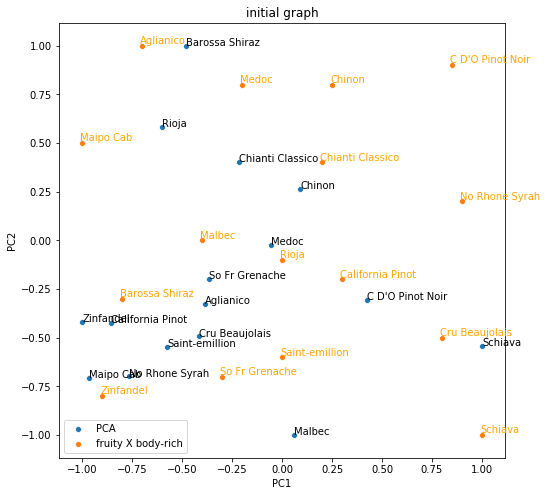

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
# Regression function invoke

df_scaled = pd.DataFrame(MinMaxScaler().fit_transform(d2), columns = d2.columns, index = d2.index)
run_pca(df_scaled, scaler = MinMaxScaler(), variance = False, interactive_plot = False)

In [11]:
d2.describe()

,10A6(P287L),10G7,10J5,1A1,1A1(V233M),1C1,1M1,2A1,2A12,2A25(S75N/A209P),...,6B1,6N1(I194T/F245L/Q261R/R293H),6P1,7C1(S99G/V126I/E171K/S210P/V247L),7D4,8B3(H20R/Q24R/V34I),8D1,8K3(L122R),9Q1,9Q2
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,-0.338751,-0.000429,-0.087787,0.080281,-0.022344,0.007591,-0.148187,0.236874,-0.131903,-0.169732,...,-0.486920,-0.302184,-0.323913,-0.467320,-0.262765,-0.080428,-0.111769,-0.157087,-0.192625,0.094503
std,0.256885,0.392168,0.268763,0.322502,0.333686,0.301616,0.218862,0.255640,0.244808,0.421507,...,0.111144,0.149213,0.135844,0.108784,0.175777,0.427442,0.283571,0.297402,0.232859,0.331486
min,-0.620615,-0.355128,-0.454521,-0.288480,-0.488317,-0.349083,-0.476039,-0.252190,-0.445721,-0.519386,...,-0.641391,-0.511710,-0.499496,-0.599174,-0.468239,-0.422256,-0.426311,-0.448187,-0.441030,-0.323149
25%,-0.508057,-0.242206,-0.278485,-0.165894,-0.285200,-0.174856,-0.281977,0.080978,-0.263911,-0.416542,...,-0.546833,-0.408383,-0.414128,-0.559707,-0.388036,-0.276907,-0.325704,-0.316945,-0.330181,-0.139012
50%,-0.381796,-0.118853,-0.134456,-0.007052,-0.096044,-0.068786,-0.161324,0.223836,-0.170723,-0.302903,...,-0.518072,-0.309076,-0.355321,-0.468420,-0.273279,-0.176053,-0.156108,-0.176233,-0.272361,-0.026753
75%,-0.273546,0.152503,0.034176,0.218994,0.259712,0.158586,-0.020032,0.448252,-0.077843,-0.107554,...,-0.461600,-0.260349,-0.254829,-0.426519,-0.219944,-0.009051,-0.016249,-0.117434,-0.127045,0.413430
max,0.370905,1.290230,0.495832,0.785915,0.539579,0.831920,0.291525,0.751103,0.555374,1.167264,...,-0.241401,0.092886,-0.083477,-0.192422,0.146775,1.377454,0.686376,0.852423,0.357772,0.614248


#### Linear Regression Analysis <a class="anchor" id="section_1_6"></a>

In [12]:
global labels
labels = d1['Map Name_short']
global countries
countries = d1['Country']
global fruity
fruity = d1['fruity']
global body_rich
body_rich = d1['body-rich']

In [13]:
pd.DataFrame(pca_data)
pc1 = pd.DataFrame(pca_data).iloc[:,0]
pc2 = pd.DataFrame(pca_data).iloc[:,1]

In [14]:
body_rich_inverted = body_rich * -1


In [15]:
fruity_inverted = fruity * -1

In [16]:
statdf = pd.DataFrame([body_rich,fruity,pc1,pc2]).transpose()

In [17]:
statdf=statdf.rename(columns={'body-rich':'body_rich'})

In [18]:
statdf['body_rich_inverted'] = body_rich_inverted
statdf['fruity_inverted'] = fruity_inverted

In [19]:
statdf

,body_rich,fruity,0,1,body_rich_inverted,fruity_inverted
0,0.00,0.1,-0.601950,0.584576,-0.00,-0.1
1,0.20,-0.8,-0.053254,-0.023200,-0.20,0.8
2,1.00,-0.5,-0.964375,-0.704537,-1.00,0.5
3,-0.30,0.2,-0.857416,-0.424904,0.30,-0.2
4,-0.90,-0.2,-0.767245,-0.699032,0.90,0.2
5,0.70,-1.0,-0.386508,-0.327904,-0.70,1.0
6,0.40,0.0,0.059092,-1.000000,-0.40,-0.0
7,0.30,0.7,-0.364680,-0.196879,-0.30,-0.7
8,0.00,0.6,-0.575141,-0.548478,-0.00,-0.6
9,0.90,0.8,-1.000000,-0.420057,-0.90,-0.8


In [20]:
# for attr in dir(result):
#     if not attr.startswith('_'):
#         print(attr)

In [21]:
# Dataframe to hold the final results
resdf = pd.DataFrame()

In [22]:
# Defining the formulas for PCA
restype = ['fruity ~ pc1','fruity ~ pc2','body_rich ~ pc1','body_rich ~ pc2']

In [23]:
# Function to populate the dataframe of results
def populating_initial(result,test):
    if 'pc1' in result.pvalues:
        re = [[str(i),result.params[0],result.pvalues[0],result.pvalues[1],result.rsquared,result.rsquared_adj,result.fvalue]]
    else:

        re = [[str(i),result.params[0],result.pvalues[0],result.pvalues[1],result.rsquared,result.rsquared_adj,result.fvalue]]
    return re

In [24]:
# Main linear regression block
for i in restype:
    mod = smf.ols(formula=i, data=statdf)
    result=mod.fit()
    res = populating_initial(result,i)
    # Loading the intermediatary results into a dataframe
    tempdf = pd.DataFrame(data =res,columns = ['Test_type','Intercept','p-value_intercept','Slope','r_squared','adj_rsquared','fvalue'])
    # updating the main dataframe
    resdf=resdf.append(tempdf)

In [25]:
# Writing the resultant dataframe into a csv file
resdf = resdf.reset_index(drop = True, inplace=False)
resdf.to_csv('Consolidated_res.csv',mode = 'w+',index=True)

#### Results <a class="anchor" id="section_1_7"></a>

In [26]:
# Displaying the results. 
resdf

,Test_type,Intercept,p-value_intercept,Slope,r_squared,adj_rsquared,fvalue
0,fruity ~ pc1,-0.096063,0.631052,0.501480,0.032888,-0.036192,0.476085
1,fruity ~ pc2,-0.079478,0.664296,0.442252,0.042759,-0.025615,0.625365
2,body_rich ~ pc1,-0.105722,0.595369,0.319383,0.070748,0.004373,1.065885
3,body_rich ~ pc2,-0.038401,0.837625,0.595457,0.020650,-0.049304,0.295194
